# Problema 16.
16.   Dos personas han quedado citas en un determinado lugar. Ambas tiene la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo $[0,30]$.

  Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo $10$.

Resolviendo el problema, obtnemos lo siguiente:


# 1.   Identificando las variables
  
Tenemos dos: $x$ y $y$.

$x=1ra\ persona\ tiempo\ de\ llegada$

$y=2da\ persona\ tiempo\ de\ llegada$
  
# 2 y 3.   Determinando la  la distribución de probabilidad y modelando las variables aleatorias

$x $~$ U[0,30]$  

$y $~$ U[0,30]$

# 4. Modelo del sistema y Objetivo

Si $|x-y|\leq{10}$  el tiempo de espera entre la llegada de ambas personas será menor o igual a $10$ minutos.

Objetivo: estimación de la probabilidad del tiempo de espera.



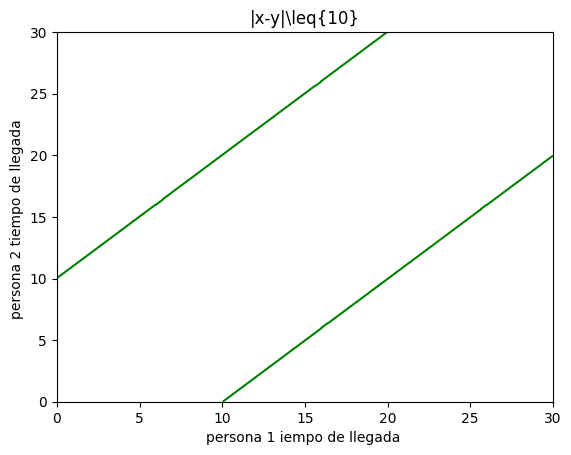

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def inequality(x, y):
    return np.abs(x - y) <= 10

x = np.linspace(0, 30, 1000)
y = np.linspace(0, 30, 1000)
X, Y = np.meshgrid(x, y)
Z = inequality(X, Y)
plt.contour(X, Y, Z, levels=[0, 1], colors=['green', 'green'])
plt.xlabel('persona 1 iempo de llegada ')
plt.ylabel('persona 2 tiempo de llegada ')
plt.title('|x-y|\leq{10}')

plt.show()

Dado que son las mismas medidas se calcula el área de los triangulos

$a=\frac{(30-10)(30-10)}{2}=200$

$AT=30^2=900$

$P=\frac{900-2(200)}{900}=0.555$

Simulación.

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [6]:
def cita():
    x_1 = random.uniform(0, 30) 
    x_2 = random.uniform(0, 30)
    t_espera = abs(x_1-x_2)
    return x_1, x_2, t_espera

print("Tiempo de llegada 1: %.1f minutos \nTiempo de llegada 2: %.1f minutos  \n\Tiempo de espera: %.1f minutos" %cita())

Tiempo de llegada 1: 17.8 minutos 
Tiempo de llegada 2: 13.4 minutos  
\Tiempo de espera: 4.4 minutos


In [7]:
def prob_inter(n):
    Espera_10 = []
    Espera = []                    
    prob = []                      
    inter = 0                       
    for i in range(n):              
        tiempos = cita()
        Espera.append(tiempos[2])
        if tiempos[2] <= 10:
          Espera_10.append(tiempos[2]) 
        prob.append(len(Espera_10)/(i+1))
    return prob

In [8]:
X = prob_inter(500)

Text(0, 0.5, 'Probabilidad')

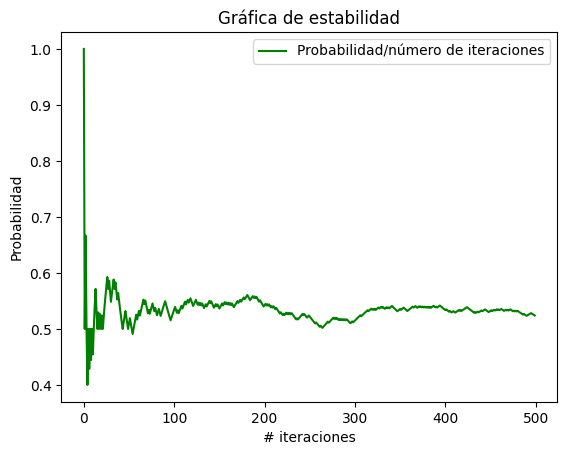

In [9]:
plt.plot(X , 'g-',label='Probabilidad/número de iteraciones')
plt.title('Gráfica de estabilidad')
plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('Probabilidad')

In [10]:
print(np.mean(X), np.std(X))

0.5336707426153869 0.027546528054500582


In [11]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [12]:
Y = np.mean(modelo(100))
print(Y)

0.5574147585136803


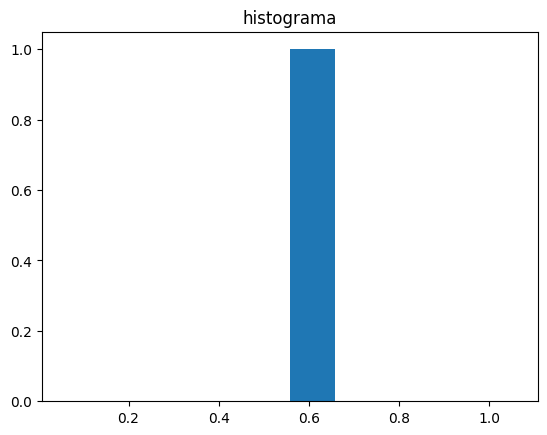

In [14]:
plt.hist(Y)
plt.title('histograma')
plt.show()

In [15]:
print("media = ", np.mean(Y), "desv estándar = ", np.std(Y))

media =  0.5574147585136803 desv estándar =  0.0
